# Versuch 1
## Dominik Bartsch, Stefan Ptacek, Niklas Kaiser
### Aufgabe 1


In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
data = 0
vec = np.zeros((21, 3))

# Abstandswerte in cm
distance = ["10", "13", "16", "19", "22", "25", "28", "31", "34", "37", "40", "43", "46", "49", "52", "55", "58", "61",
        "64", "67", "70"]
# Volt werte
volt = ["1,343", "1,2102", "1,050", "0,974", "0,855", "0,790", "0,760", "0,698", "0,642", "0,603", "0,581", "0,563", "0,543", "0,466", "0,464", "0,447", "0,444", "0,447", "0,390", "0,380", "0,322"]


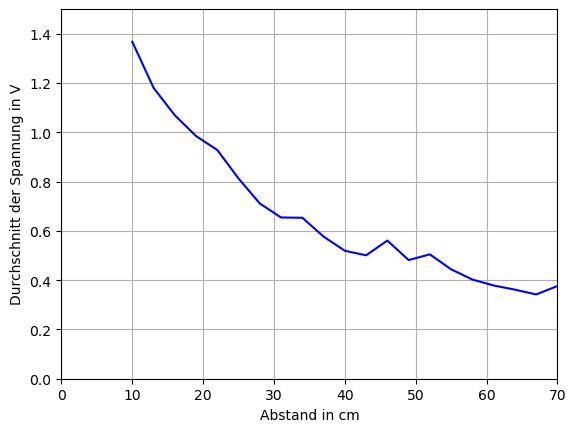

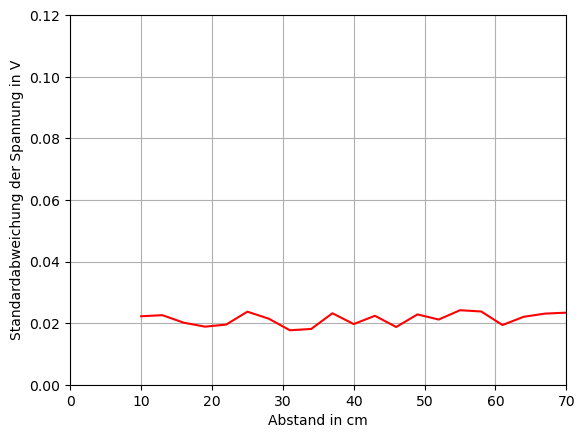

[0.3735544 0.3735544 0.3268024 ... 0.3735544 0.4203064 0.3735544]


In [50]:
# For Schleife um die einzelnen Dateien einzulesen
for idx, x in enumerate(distance):
    # data sind die Werte aus den .csv Dateien. Mit rang[ten] werden die einzelnen Abstandswerte aus rang abgerufen
    
    #x.replace(',' '.').encode()
    data = np.genfromtxt('messungA1/' + str(distance[idx]) + 'cm.csv', delimiter=";", skip_header=1000, skip_footer=500,
                         usecols=(1), converters={1: lambda s: float(s.decode('utf-8').replace(',', '.'))})

    # Stelle 0: Abstand in cm
    vec[idx, 0] = distance[idx]
    # Stelle 1: Durchschnitt der Spannung für einen bestimmten Abstand in cm
    vec[idx, 1] = np.mean(data)
    # Stelle 2: Standartabweichung der Spannung für einen bestimmten Abstand in cm
    vec[idx, 2] = np.std(data)

# Zeichnung des Graphen für den Durchschnitt der Spannung
plt.plot([10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61, 64, 67, 70],
         [vec[0, 1], vec[1, 1], vec[2, 1], vec[3, 1], vec[4, 1], vec[5, 1], vec[6, 1], vec[7, 1], vec[8, 1], vec[9, 1],
          vec[10, 1], vec[11, 1], vec[12, 1], vec[13, 1], vec[14, 1], vec[15, 1], vec[16, 1], vec[17, 1], vec[18, 1],
          vec[19, 1], vec[20, 1]], 'b')
plt.ylabel('Durchschnitt der Spannung in V')
plt.xlabel('Abstand in cm')
plt.axis([0, 70, 0, 1.5])
plt.grid(True)
plt.show()

# Zeichnung des Graphen für die Standartabweichung der Spannung
plt.plot([10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61, 64, 67, 70],
         [vec[0, 2], vec[1, 2], vec[2, 2], vec[3, 2], vec[4, 2], vec[5, 2], vec[6, 2], vec[7, 2], vec[8, 2], vec[9, 2],
          vec[10, 2], vec[11, 2], vec[12, 2], vec[13, 2], vec[14, 2], vec[15, 2], vec[16, 2], vec[17, 2], vec[18, 2],
          vec[19, 2], vec[20, 2]], 'r')
plt.ylabel('Standardabweichung der Spannung in V')
plt.xlabel('Abstand in cm')
plt.axis([0, 70, 0, 0.12])
plt.grid(True)
plt.show()

print(data)

### Aufgabe 2

In [53]:
from scipy import stats
import math as m

#       Aufgabe2      #

data = 0
# Matrix gefüllt mit 0en 21 Zeilen, 2 Spalten
vec2 = np.zeros((21, 3))

# Abstandswerte in cm
distance = ["10", "13", "16", "19", "22", "25", "28", "31", "34", "37", "40", "43", "46", "49", "52", "55", "58", "61",
        "64", "67", "70"]

# For Schleife um die einzelnen Dateien einzulesen
for idx, x in enumerate(distance):
    # ten als Index
    # data sind die Werte aus den .csv Dateien. Mit rang[ten] werden die einzelnen Abstandswerte aus rang abgerufen
    data = np.genfromtxt('messungA1/' + str(distance[idx]) + 'cm.csv', delimiter=";", skip_header=1000, skip_footer=500,
                         usecols=(1), converters={1: lambda s: float(s.decode('utf-8').replace(',', '.'))})

    # Stelle 0: Logarithmus des Abstandes in cm
    vec2[idx, 0] = np.log(int(distance[idx]))
    # Stelle 1: Logarithmus des Durchschnittes der Spannung in Volt
    vec2[idx, 1] = np.log(np.mean(data))
    # Stelle 2: Logarithmus der Distanz in cm durch die Logarithmierung der Spannung in Volt
    vec2[idx, 2] = np.log(np.std(data)) / np.log(np.mean(data))

# x-Werte des Graphen  zur Darstellung der Linearen Regression
x = np.array(
    [vec2[0, 0], vec2[1, 0], vec2[2, 0], vec2[3, 0], vec2[4, 0], vec2[5, 0], vec2[6, 0], vec2[7, 0], vec2[8, 0],
     vec2[9, 0], vec2[10, 0], vec2[11, 0], vec2[12, 0], vec2[13, 0], vec2[14, 0], vec2[15, 0], vec2[16, 0], vec2[17, 0],
     vec2[18, 0], vec2[19, 0], vec2[20, 0]])
# y-Werte des Graphen  zur Darstellung der Linearen Regression
y = np.array(
    [vec2[0, 1], vec2[1, 1], vec2[2, 1], vec2[3, 1], vec2[4, 1], vec2[5, 1], vec2[6, 1], vec2[7, 1], vec2[8, 1],
     vec2[9, 1], vec2[10, 1], vec2[11, 1], vec2[12, 1], vec2[13, 1], vec2[14, 1], vec2[15, 1], vec2[16, 1],
     vec2[17, 1], vec2[18, 1], vec2[19, 1], vec2[20, 1]])

# Funktion zur Generierung der Linearen Regression in Python
gradient, intercept, r_value, p_value, std_err = stats.linregress(x, y)
mn = np.min(x)
mx = np.max(x)
x1 = np.linspace(mn, mx, 500)
y1 = gradient * x1 + intercept

# Darstellung der Linearen Regression in einem Graphen
plt.plot(x, y, 'ob')
plt.plot(x1, y1, '-r')
plt.grid(True)
plt.ylabel('logarithmierter Durchschnitt der Spannung in V')
plt.xlabel('logarithmierter Abstand in cm')
plt.show()

# Darstellung der Logarithmierung von der avg Spannung und dem Abstand
plt.plot([vec2[0, 0], vec2[1, 0], vec2[2, 0], vec2[3, 0], vec2[4, 0], vec2[5, 0], vec2[6, 0], vec2[7, 0], vec2[8, 0],
          vec2[9, 0], vec2[10, 0], vec2[11, 0], vec2[12, 0], vec2[13, 0], vec2[14, 0], vec2[15, 0], vec2[16, 0],
          vec2[17, 0], vec2[18, 0], vec2[19, 0], vec2[20, 0]],
         [vec2[0, 1], vec2[1, 1], vec2[2, 1], vec2[3, 1], vec2[4, 1], vec2[5, 1], vec2[6, 1], vec2[7, 1], vec2[8, 1],
          vec2[9, 1], vec2[10, 1], vec2[11, 1], vec2[12, 1], vec2[13, 1], vec2[14, 1], vec2[15, 1], vec2[16, 1],
          vec2[17, 1], vec2[18, 1], vec2[19, 1], vec2[20, 1]], 'b')
plt.ylabel('logarithmierter Durchschnitt der Spannung in V')
plt.xlabel('logarithmierter Abstand in cm')
plt.grid(True)
plt.show()

# Darstellung der Kennlinie in einem Graphen
plt.plot([vec2[0, 0], vec2[1, 0], vec2[2, 0], vec2[3, 0], vec2[4, 0], vec2[5, 0], vec2[6, 0], vec2[7, 0], vec2[8, 0],
          vec2[9, 0], vec2[10, 0], vec2[11, 0], vec2[12, 0], vec2[13, 0], vec2[14, 0], vec2[15, 0], vec2[16, 0],
          vec2[17, 0], vec2[18, 0], vec2[19, 0], vec2[20, 0]],
         [vec2[0, 0], vec2[1, 0], vec2[2, 0], vec2[3, 0], vec2[4, 0], vec2[5, 0], vec2[6, 0], vec2[7, 0], vec2[8, 0],
          vec2[9, 0], vec2[10, 0], vec2[11, 0], vec2[12, 0], vec2[13, 0], vec2[14, 0], vec2[15, 0], vec2[16, 0],
          vec2[17, 0], vec2[18, 0], vec2[19, 0], vec2[20, 0]], marker="o")
plt.ylabel('logarithmierter Abstand in cm')
plt.xlabel('logarithmierter Abstand in cm')
plt.grid(True)
plt.show()

ModuleNotFoundError: No module named 'scipy'

### Aufgabe 3

In [55]:
data = 0
data2 = 0
faktor2 = 1.96

# data sind die Werte aus der (21cm) breiten DinA4 Seite in die .csv Datei gespeichert wurden.
data = np.genfromtxt('messungA3/dinA4-kurz.csv', delimiter=";", skip_header=1000, skip_footer=500,
                     usecols=(1), converters={1: lambda s: float(s.decode('utf-8').replace(',', '.'))})

# data2 sind die Werte aus der (29,7cm) langen DinA4 Seite in die .csv Datei gespeichert wurden.
data2 = np.genfromtxt('messungA3/dinA4-lang.csv', delimiter=";", skip_header=1000, skip_footer=500,
                      usecols=(1), converters={1: lambda s: float(s.decode('utf-8').replace(',', '.'))})

# Standartabweichung und Average ausrechnen aufgrund der Gaußverteilung mit 2sx und 4sx
avglang = np.mean(data2)
stdlang = np.std(data2) / np.sqrt(1000)
avgbreit = np.mean(data)
stdbreit = np.std(data) / np.sqrt(1000)

result1 = avglang + 1 * stdlang * 2
result2 = avglang + 1.96 * stdlang * 4

# LaTeX Format für Tabellen um die Tabelle automatisch generieren zu lassen mittels der For Schleife
print("\\hline")
print(str(np.mean(data2)) + " \\\\")
print("\\hline")
print(str(np.mean(data)) + " \\\\")

print("x(68%) = " + str(avglang) + "V + " + "1 * " + str(stdlang) + "V * 2")
print("x(95%) = " + str(avglang) + "V + " + "1,96 * " + str(stdlang) + "V * 4")
print()
print(result1)
print(result2)
print()
# Funktionen zur Berechnung
a1 = np.log(29.7) / np.log(np.mean(data2))
b1 = np.log(29.7) - (a1 * np.log(np.mean(data2)))
z1 = (np.exp(b1) * a1 * np.mean(data2) ** (a1 - 1))

# Gaußverteilung mit 68,26% und 95%
# Korrekturfaktor = 1,0 und 1,96
korrektur_lang = (np.mean(data2) + faktor2 * stdlang) - np.mean(data2)
deltaya68 = z1 * stdlang
deltaya95 = z1 * korrektur_lang

# e^b * x^a  -  Umkehrung der doppelten Logarithmierung
y1 = np.exp(b1) * np.power(np.mean(data2), a1)

# Ausgeben der errechneten Messkorrekturen für die jeweilige Gaußverteilung
print("y(68%) = " + str(round(y1, 2)) + " cm +-" + str(deltaya68 * -1) + " cm")
print("y(95%) = " + str(round(y1, 2)) + " cm +-" + str(deltaya95 * -1) + " cm")

# Berechnung von 21 cm Messfehler #
a2 = np.log(21) / np.log(np.mean(data))
b2 = np.log(21) - (a2 * np.log(np.mean(data)))
z2 = (np.exp(b2) * a2 * np.mean(data) ** (a2 - 1))

# Gaußverteilung mit 68,26% und 95%
# Korrekturfaktor = 1,0 und 1,96
korrektur_breit = (np.mean(data) + faktor2 * stdbreit) - np.mean(data)
deltayb68 = z2 * stdbreit
deltayb95 = z2 * korrektur_breit

# e^b * x^a  -  Umkehrung der doppelten Logarithmierung
y2 = np.exp(b2) * np.power(np.mean(data), a2)

# Errechnung des Flächeninhalts
flache = round(y2, 2) * round(y1, 2)
# Ausgeben der errechneten Messkorrekturen für die jeweilige Gaußverteilung
print("y(68%) = " + str(round(y2, 2)) + " cm +-" + str(deltayb68 * -1) + " cm")
print("y(95%) = " + str(round(y2, 2)) + " cm +-" + str(deltayb95 * -1) + " cm")
print()
print("Ein DinA4 Blatt hat ein Flächeninhalt von " + str(round(flache, 2)) + " cm^2")
print("68% hat bei einem Flächeninhalt von " + str(round(flache, 2)) + "cm^2 einen Messfehler von +" + str(
    (deltaya68 + deltayb68)) + "cm")
print("95% hat bei einem Flächeninhalt von " + str(round(flache, 2)) + "cm^2 einen Messfehler von +" + str(
    (deltaya95 + deltayb95)) + "cm")

\hline
0.7098321200790189 \\
\hline
0.9088772273660747 \\
x(68%) = 0.7098321200790189V + 1 * 0.0006700726399145363V * 2
x(95%) = 0.7098321200790189V + 1,96 * 0.0006700726399145363V * 4

0.7111722653588479
0.7150854895759489

y(68%) = 29.7 cm +-0.27740945495678315 cm
y(95%) = 29.7 cm +-0.5437225317153107 cm
y(68%) = 21.0 cm +-0.5622845024343396 cm
y(95%) = 21.0 cm +-1.1020776247713417 cm

Ein DinA4 Blatt hat ein Flächeninhalt von 623.7 cm^2
68% hat bei einem Flächeninhalt von 623.7cm^2 einen Messfehler von +-0.8396939573911227cm
95% hat bei einem Flächeninhalt von 623.7cm^2 einen Messfehler von +-1.6458001564866525cm
